In [ ]:
# '나비야' 악보 계명

note_seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [ ]:
# 악보 사전 (딕셔너리)

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

In [ ]:
note_seq[0:4], note_seq[1:5], note_seq[2:6]

(['g8', 'e8', 'e4', 'f8'], ['e8', 'e4', 'f8', 'd8'], ['e4', 'f8', 'd8', 'd4'])

# Data preprocessing

In [ ]:
range(len(note_seq)-4)  # 4개씩 묶기 위해 50까지 출력

range(0, 50)

In [ ]:
dataset = list()
for i in range(len(note_seq)-4):
  subset = note_seq[i:i+4]  # [g8, e8,,,]
  items  = list()

  for item in subset:
    items.append(code2idx[item])  # item은 key값, code2index[item]는 value값(숫자)
  
  dataset.append(items)
print(dataset)

[[11, 9, 2, 10], [9, 2, 10, 8], [2, 10, 8, 1], [10, 8, 1, 7], [8, 1, 7, 8], [1, 7, 8, 9], [7, 8, 9, 10], [8, 9, 10, 11], [9, 10, 11, 11], [10, 11, 11, 4], [11, 11, 4, 11], [11, 4, 11, 9], [4, 11, 9, 9], [11, 9, 9, 9], [9, 9, 9, 10], [9, 9, 10, 8], [9, 10, 8, 1], [10, 8, 1, 7], [8, 1, 7, 9], [1, 7, 9, 11], [7, 9, 11, 11], [9, 11, 11, 9], [11, 11, 9, 9], [11, 9, 9, 2], [9, 9, 2, 8], [9, 2, 8, 8], [2, 8, 8, 8], [8, 8, 8, 8], [8, 8, 8, 8], [8, 8, 8, 9], [8, 8, 9, 3], [8, 9, 3, 9], [9, 3, 9, 9], [3, 9, 9, 9], [9, 9, 9, 9], [9, 9, 9, 9], [9, 9, 9, 10], [9, 9, 10, 4], [9, 10, 4, 11], [10, 4, 11, 9], [4, 11, 9, 2], [11, 9, 2, 10], [9, 2, 10, 8], [2, 10, 8, 1], [10, 8, 1, 7], [8, 1, 7, 9], [1, 7, 9, 11], [7, 9, 11, 11], [9, 11, 11, 9], [11, 11, 9, 9]]


In [ ]:
import numpy as np

datasets = np.array(dataset)

In [ ]:
x_train = datasets[:, 0:3] # 1행에 3열씩 데이터 나눔
x_train.shape

(50, 3)

In [ ]:
y_train =  datasets[:,3] # dataset의 인덱스3 값만 뽑음
y_train.shape

(50,)

In [ ]:
# 정규화: code2idx의 max값으로 나눔

x_train = x_train / 13
x_train[3]

array([0.76923077, 0.61538462, 0.07692308])

# Make model

In [ ]:
import tensorflow as tf

In [ ]:
x_train.shape  # Input size= 3 (컬럼 개수)
x_train[2]

array([0.15384615, 0.76923077, 0.61538462])

In [ ]:
# numpy 배열(1차원 scaler) -> tensorflow type(matrix) 으로 바꾸기

x_train = np.reshape(x_train, (50, 3, 1))
x_train.shape, x_train[2]

((50, 3, 1), array([[0.15384615],
        [0.76923077],
        [0.61538462]]))

In [ ]:
np.unique(y_train)  # y_train은 9개지만 code2idx는 총 13개임

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11])

In [ ]:
model = tf.keras.Sequential()

# Input Layer 
model.add(tf.keras.layers.Input(shape=(3,1)))
# 값을 그대로 쓰는거라 embedding 할 필요 없음
# (batch_size, timesteps, input_dim) -> (rows, cols, 1)
# **kwargs-> dict, *kwargs-> list

# Hidden Layer
model.add(tf.keras.layers.LSTM(128))

# Output Layer
model.add(tf.keras.layers.Dense(13, activation='softmax'))

# Gadget
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# onehot-encoding 안 함 -> sparse_categorical_crossentropy
# onehot-encoding 함 -> categorical_crossentropy

In [ ]:
hist = model.fit(x_train, y_train, epochs=1000, batch_size=5)

# batch_size= 5 -> step size= 50/5= 10 

Epoch 1/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.0589 - accuracy: 0.6000
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.0471 - accuracy: 0.6200
Epoch 3/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.0825 - accuracy: 0.6000
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.1239 - accuracy: 0.5400
Epoch 5/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.0694 - accuracy: 0.5800
Epoch 6/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.0496 - accuracy: 0.6000
Epoch 7/1000
10/10 [==============================] - 0s 5ms/step - loss: 1.0503 - accuracy: 0.5800
Epoch 8/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.0366 - accuracy: 0.6200
Epoch 9/1000
10/10 [==============================] - 0s 7ms/step - loss: 1.0375 - accuracy: 0.6200
Epoch 10/1000
10/10 [==============================] - 0s 6ms/step - loss: 1.0522 - accuracy: 0.6200

In [ ]:
model.evaluate(x_train, y_train)

2/2 [==============================] - 0s 8ms/step - loss: 0.4132 - accuracy: 0.8000


[0.41323238611221313, 0.800000011920929]

In [ ]:
x_train[0:1]

array([[[0.84615385],
        [0.69230769],
        [0.15384615]]])

In [ ]:
model.predict(x_train[0:1])  # 의견이 나옴 

array([[1.1351039e-08, 2.2546826e-06, 1.1716110e-02, 4.1400273e-07,
        2.9946932e-06, 1.2480857e-08, 1.2709166e-08, 3.0826504e-04,
        7.7219686e-04, 2.2590732e-02, 9.6373081e-01, 8.7620277e-04,
        2.9075485e-08]], dtype=float32)

In [ ]:
# first = 0.61538462
# second = 0.07692308
# third = 0.53846154
# pred = model.predict( [[ [first], [second], [third] ]] )

# predict에 직접 값을 넣을 때 괄호 씌우기

In [ ]:
pred = model.predict( x_train[0:1] )

In [ ]:
np.argmax(pred)

10



---



---


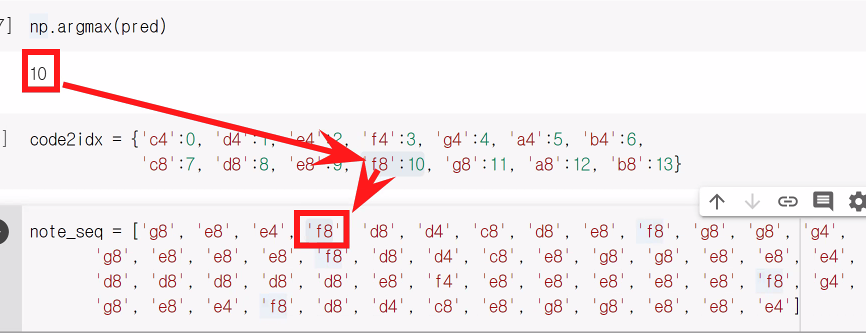